# Salinity Setup <br> Data Preprocessing
***

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<br>

## Features
***
**Outline**  
[Principal Component Analysis](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 "Towards Data Sciene | PCA using Python (scikit-learn)") & 
[Data loading & preprocessing](https://keras.io/getting_started/intro_to_keras_for_engineers/#data-loading-amp-preprocessing "Keras") 
1. Load and normalize data
2. Apply PCA transformation
3. Normalize principal components

<br>

### 1. Loading & Normalization

In [2]:
feat = xr.merge([
    xr.open_dataset('data/da_pred_all.nc'),
    xr.open_dataset('data/da_pred_salinty.nc')
]).to_dataframe()

feat_unit = pd.DataFrame(
    data = StandardScaler().fit_transform(feat), 
    columns = feat.columns,
    index =  feat.index
)

# print(feat_unit.mean())
# print(feat_unit.std())
# display(feat_unit)
# display(feat_unit.describe())

<br>

### 2. PCA

In [3]:
# Scikit pca transformation
pca = PCA().fit(feat_unit)

pca_components = pd.DataFrame(
    data = pca.components_
)

feat_pc = pd.DataFrame(
    data = np.dot(feat_unit, pca_components.T), # already centered '- pca.mean_' not necessary
    columns = [f'PC{i}' for i in range(1, len(feat_unit.columns)+1)],
    index =  feat.index
)    

# print(feat_pc.mean())
# print(feat_pc.std())
# display(feat_pc)
# display(feat_pc.describe())

In [4]:
feat_unit

,siod_e,siod_w,sst_med,tsa,tna,sst_mdr,sata_lnh,sata_lsh,sata_onh,sata_osh,...,amo,nao,pdo,np,nino12,nino3,nino34,nino4,sssa_na,sssa_sa
year,,,,,,,,,,,,,,,,,,,,,
1901,-1.100027,-1.152764,-0.745530,-0.595366,0.388372,0.608415,-0.123443,-0.732091,-0.497808,-0.737797,...,0.923204,0.917456,-0.193321,1.938388,-0.950168,-0.595561,-0.214314,-0.079270,0.655532,0.602499
1902,0.088643,0.340415,-1.507314,-0.954566,-0.346586,-0.173588,-1.289978,-0.201810,-1.175314,-0.987096,...,-0.620146,-1.172590,0.819716,-0.162154,0.991321,0.969845,1.099218,1.070532,0.634311,0.258427
1903,-0.900789,0.669332,-2.243639,-2.186294,-0.101970,0.283583,-1.333183,-1.076056,-1.415719,-1.333946,...,-0.458290,-1.030410,-0.186187,0.530864,-0.371251,0.000784,0.524139,0.842095,0.043850,0.471247
1904,-0.949568,-1.056219,-0.079925,-1.975498,-2.214111,-1.894743,-1.135674,-1.133384,-1.863746,-1.778347,...,-1.872482,1.447076,-0.892459,0.756497,-0.307712,-0.234313,-0.475713,-0.741738,0.530848,0.575278
1905,-0.034350,-0.632249,-0.718895,-1.684676,-1.334312,-1.014906,-1.314666,-0.595938,-1.284589,-0.954579,...,-0.499163,-1.289888,0.545055,-0.326007,1.227830,1.497381,1.439037,1.032459,0.396927,0.532276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,1.195941,0.583772,0.639626,1.003018,1.582829,1.303061,1.610929,1.761660,1.567490,1.375820,...,0.555350,1.141389,-0.550024,0.721578,-1.465545,-0.647168,-0.286199,0.034949,-0.461068,1.914087
2014,2.023636,1.289688,1.409613,1.354204,0.162384,0.342794,2.036807,1.847651,2.092010,1.700992,...,0.035451,-0.237757,1.094378,-0.100373,0.606553,1.170538,0.948913,1.078147,-0.197876,1.565808
2015,2.226665,1.764942,2.001272,1.161939,0.276530,0.362771,2.178766,2.026800,2.518182,1.809382,...,0.092673,1.404422,1.247760,0.281055,1.580828,2.093726,2.255911,2.532532,-1.038432,2.059816


In [5]:
feat_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
year,,,,,,,,,,,,,,,,,,,,,
1901,-1.448100,-0.988055,-1.831115,-0.093303,-1.216952,1.326158,-0.323752,0.603090,-1.621739,-0.371594,...,-1.247502,-0.517041,-0.051968,0.295965,-0.079911,0.315402,0.006896,0.185167,0.182891,0.005946
1902,-0.486753,2.651833,-0.796885,0.328434,2.035607,2.645670,0.100720,0.199712,-1.762942,-0.579130,...,0.438948,-0.092332,-0.411823,0.236401,0.084996,-0.591200,0.006940,0.003806,0.025443,-0.043698
1903,-2.299652,1.634670,-1.287301,-0.172967,1.365117,1.326004,-1.070828,0.762107,-1.725267,0.631677,...,0.332137,-0.782816,-0.242917,0.026456,0.253325,-0.212574,0.016677,0.001932,0.146107,-0.005529
1904,-5.037961,0.375492,0.172603,1.919349,-0.652566,1.491636,0.977128,0.557021,-0.269100,0.615024,...,0.350871,0.362969,-0.519302,0.112982,-0.348566,-0.100952,0.098975,-0.050902,0.239010,0.062627
1905,-1.231468,4.193341,-0.164357,1.642997,0.581816,-0.618450,-1.617789,0.790584,1.324908,-0.266027,...,-0.067894,0.360688,0.226720,-0.205175,-0.138728,-0.398312,0.334514,-0.110083,0.180749,0.099679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,3.049350,-3.332021,0.327818,0.484582,-1.179290,-0.464816,0.163545,0.697839,-1.229851,0.888779,...,-0.017882,-1.221180,-0.321761,-0.351936,-0.126933,-0.127789,0.287654,-0.421459,-0.070777,-0.004422
2014,4.914815,-0.727248,1.390861,1.324686,0.482945,0.412985,0.893763,1.265534,0.071366,0.341176,...,0.546703,0.037916,-0.010784,0.458917,0.046646,0.203375,-0.215418,-0.253936,0.044088,0.097449
2015,6.591440,1.202165,2.309644,2.114795,-1.207829,0.828209,1.484993,1.590163,-0.177081,0.162024,...,-0.126920,-0.371819,0.385036,0.506442,0.283492,-0.154939,-0.440982,-0.195386,-0.125473,-0.054454


<br>

### 3. Normalize Principal Components

In [6]:
feat_pc = pd.DataFrame(
    data = StandardScaler().fit_transform(feat_pc), 
    columns = feat_pc.columns,
    index =  feat_pc.index
)

# print(feat_pc.mean())
# print(feat_pc.std())
# display(feat_pc)
# display(feat_pc.describe())

<br>

## Labels
---

**label:** from Sahelrainfall data serves as validation data

In [7]:
# load validatoin data (Summer Rainfall over Sahel) 
labels = np.mean(np.loadtxt("data/da_o_sahelprecip19012017.txt", skiprows=8,)[:,7:10] * 0.01,  axis=1)

# eventually normlaize output as well
# labels = np.squeeze(StandardScaler().fit_transform(np.reshape(labels, (117,1))))

# display(labels)

<br>

## Merge to Xarray DataSet
---

In [8]:
model_data = xr.Dataset(
    data_vars=dict(
        feat_pc = (['year', 'pc'], feat_pc),
        labels = (['year'],labels),
        feat_standardized = (['year', 'indices'], feat_unit),
        pca_components = (['n_components', 'n_features'], pca_components),
    ),
    coords=dict(
        year = feat_pc.index,
        pc = feat_pc.columns,
        indices = feat.columns,
        n_features = range(22),
        n_components = range(22)
    )
)

model_data.to_netcdf('data/da_final_salinitymodel.nc')

# display(model_data)

<br>

## Explained Vairance
---

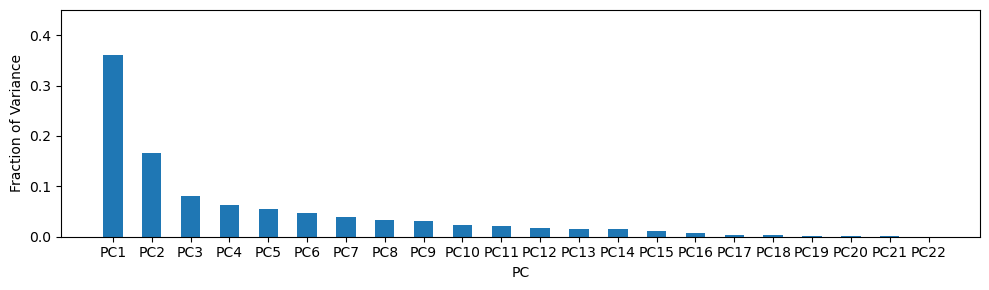

In [9]:
plt.figure(figsize=[10, 3], dpi=100)

plt.bar(feat_pc.columns, pca.explained_variance_ratio_, width=0.5)

plt.xlabel("PC")
plt.ylabel("Fraction of Variance")
plt.ylim(0, 0.45)

plt.tick_params(axis='x',which='minor', labelsize=11)

plt.tight_layout()
plt.savefig('./overleaf/img/salinitymodel_pc_var.pdf', facecolor='w')

In [10]:
pca.explained_variance_ratio_[:10].sum()

0.90011471867075